In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set()

In [2]:
#Reading CSV data file
df =pd.read_csv('cardio_train.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (70000, 13)


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Data Preprocessing: Preparing of data before putting it through a machine learning model

In [6]:
#Converting number of days for age to years
df['age']= df['age'] / 365.25

In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
#Dropping unecessary 'id' column
df=df.drop(['id'],axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0


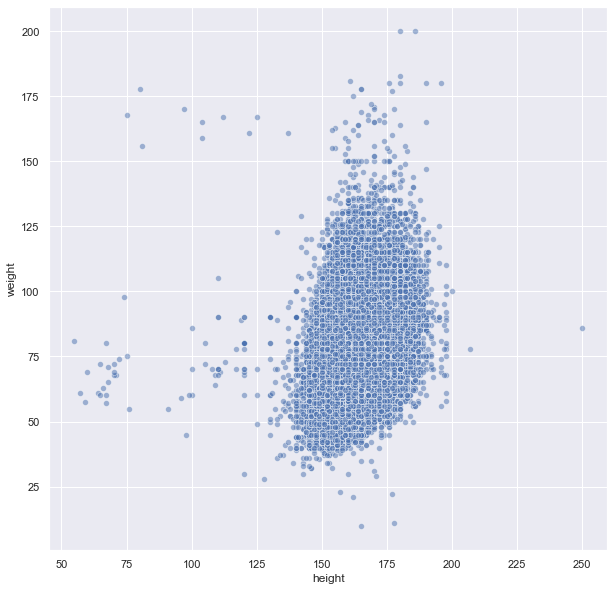

In [9]:
#Scatter plot of Height vs Weight before removing unreasonable data points 
f, ax = plt.subplots(figsize = (10,10))
sb.scatterplot(data=df, x="height", y="weight", alpha=0.5)

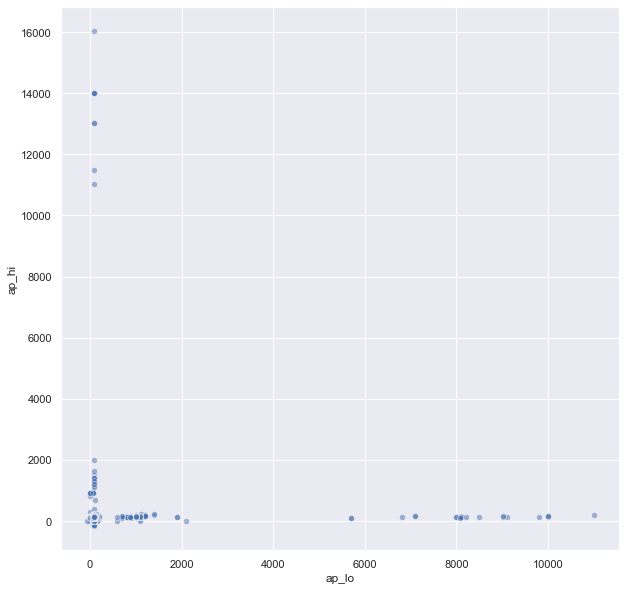

In [10]:
#Scatter plot of ap_lo vs ap_hi  before removing unreasonable data points 
f, ax = plt.subplots(figsize = (10,10))
sb.scatterplot(data=df, x="ap_lo", y="ap_hi", alpha=0.5)

In [11]:
#Creating BMI column for preprocessing
df['bmi']=df['weight']/((df['height']/100) ** 2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [12]:
#Removing unreasonable data
indexNames = df[ (df['bmi'] <= 14) | (df['bmi'] >= 44.9) | (df['ap_hi'] <= 50) | (df['ap_hi'] >= 240) | (df['ap_lo'] <= 35) | (df['ap_lo'] >= 130)].index
df.drop(indexNames , inplace=True)
df=df.drop(columns=["bmi"])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68077.000000,68077.000000,68077.000000,68077.000000,68077.000000,68077.000000,68077.000000,68077.000000,68077.000000,68077.000000,68077.000000,68077.000000
mean,53.284458,1.350148,164.471290,73.719698,126.498524,81.249923,1.362252,1.223732,0.088224,0.053410,0.803340,0.492986
std,6.759369,0.477020,7.833712,13.524925,16.557100,9.355971,0.677047,0.569503,0.283622,0.224852,0.397476,0.499954
min,29.563313,1.000000,120.000000,28.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.331280,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.932923,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.379192,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.922656,2.000000,207.000000,147.000000,230.000000,126.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


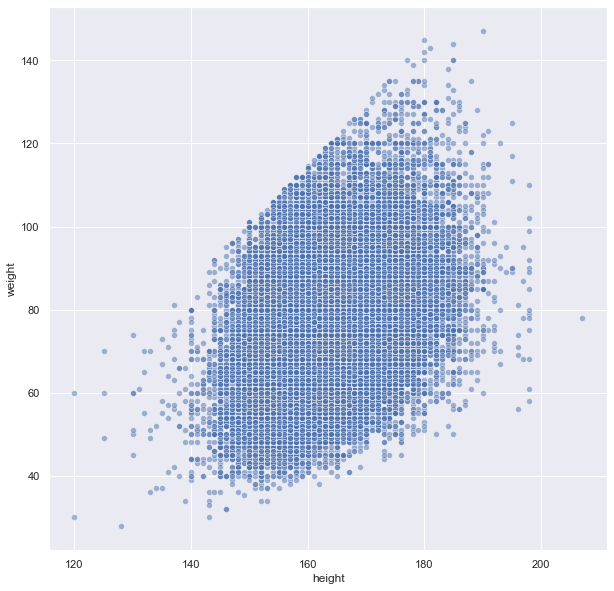

In [14]:
#Scatter plot of Height vs Weight after removing unreasonable data points 
f, ax = plt.subplots(figsize = (10,10))
sb.scatterplot(data=df, x="height", y="weight", alpha=0.5)

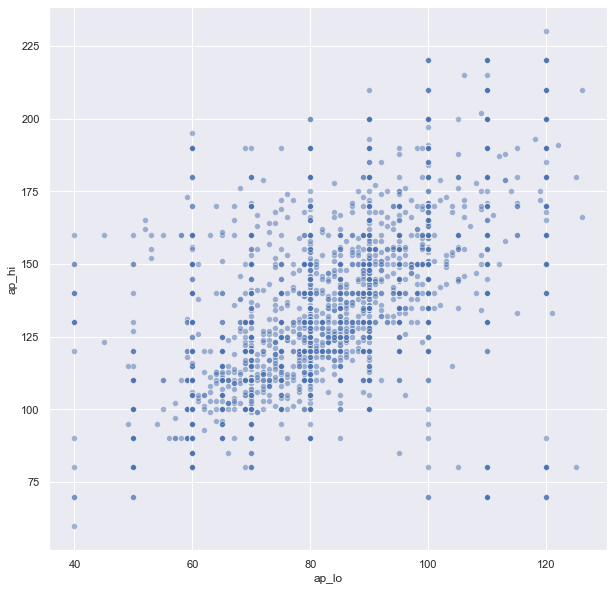

In [15]:
#Scatter plot of ap_lo vs ap_hi after removing unnatural data points 
f, ax = plt.subplots(figsize = (10,10))
sb.scatterplot(data=df, x="ap_lo", y="ap_hi", alpha=0.5)

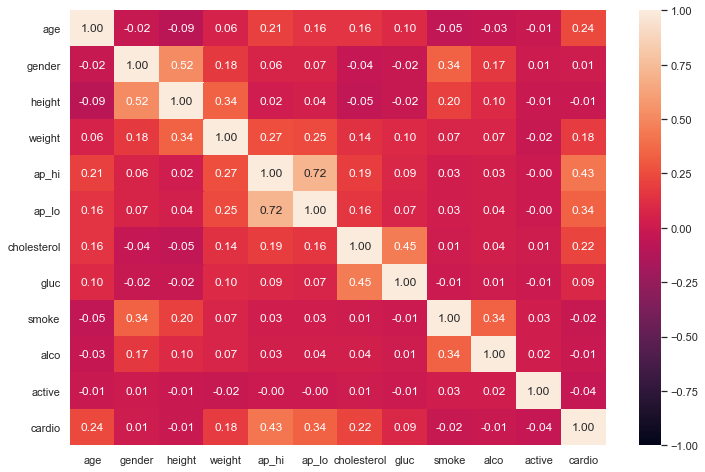

In [16]:
#Correlation heat map
f = plt.figure(figsize=(12, 8))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

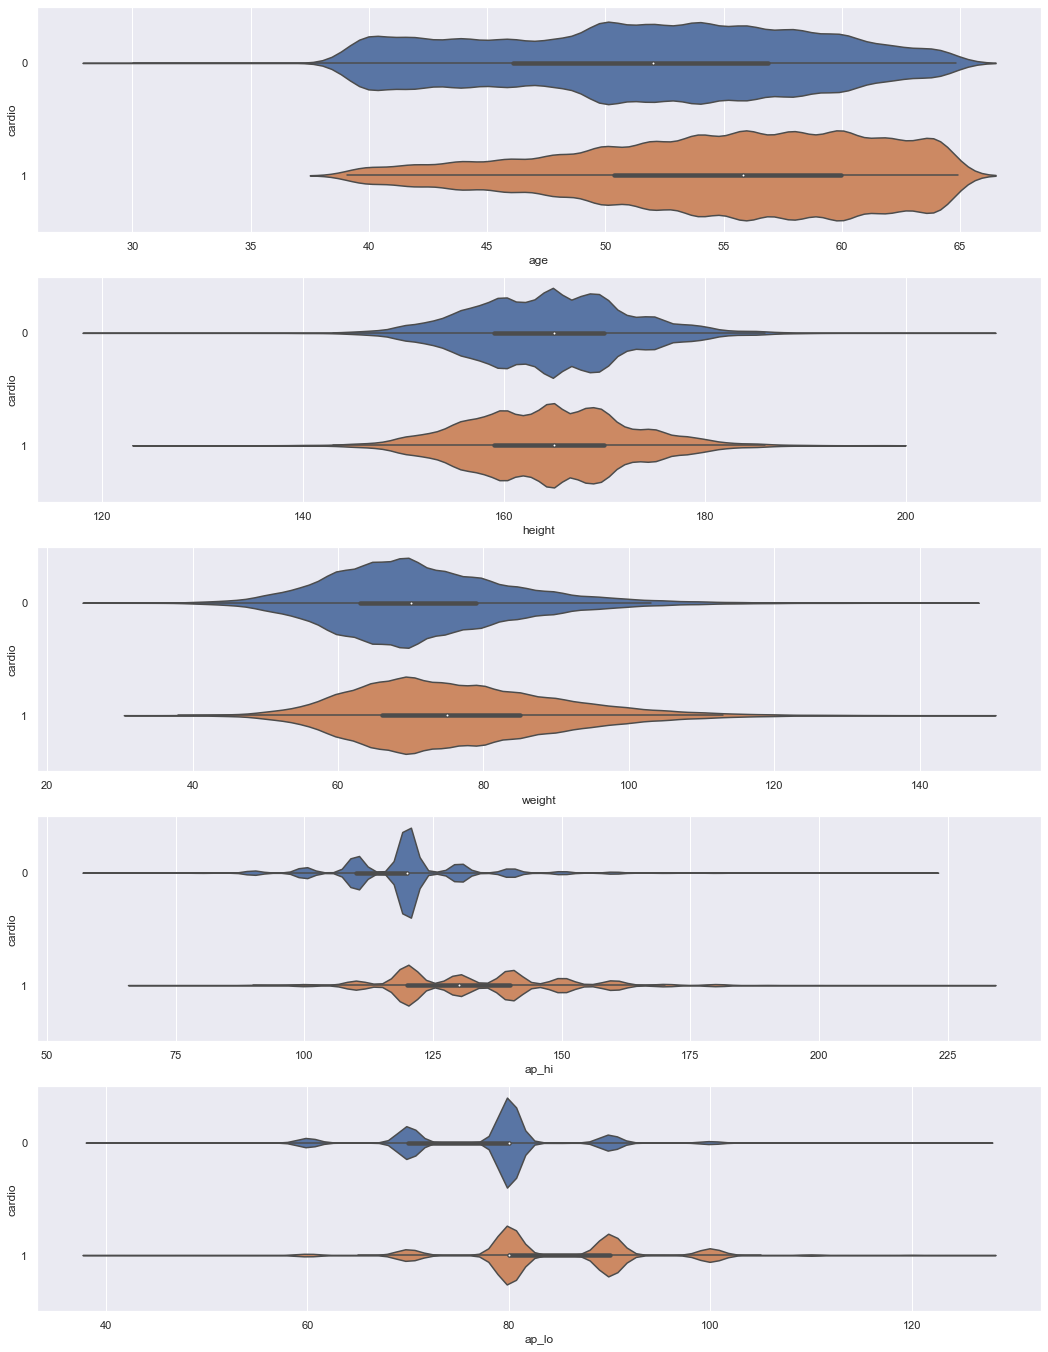

In [17]:
#Violin plots of numeric data sets against cardio
X = df.drop(columns = ['cardio','gender','cholesterol','gluc','smoke','alco','active'])
y = df['cardio']
f, axes = plt.subplots(5, 1, figsize=(18, 24))

count = 0
for var in X:
    sb.violinplot(X[var],y, orient = "h", ax = axes[count])
    count += 1

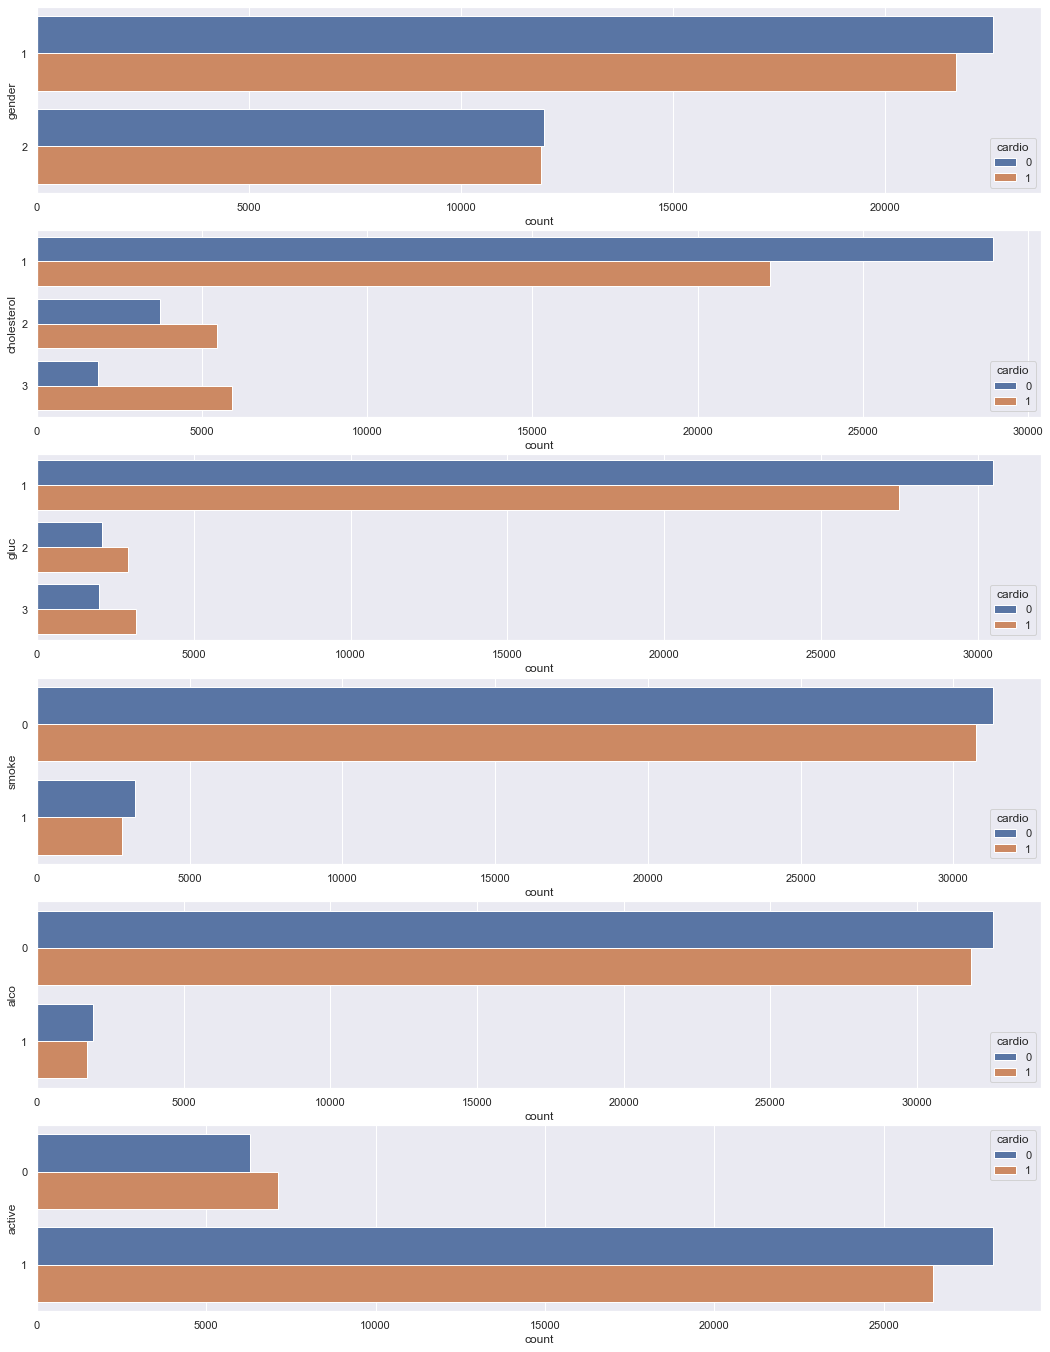

In [18]:
# Count plot of binary and categorical data sets against cardio
f, axes = plt.subplots(6, 1, figsize=(18, 24))
Xc = df.drop(columns = ['cardio','age','height','weight','ap_hi','ap_lo'])
count = 0
for var in Xc:
    sb.countplot(y = var, hue = "cardio", data = df, ax = axes[count])
    count += 1

In [19]:
#Spliting features from target variable
x=df.iloc[:,:-1]
y=pd.DataFrame(df['cardio'])
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.357290,2,168,62.0,110,80,1,1,0,0,1
1,55.381246,1,156,85.0,140,90,3,1,0,0,1
2,51.627652,1,165,64.0,130,70,3,1,0,0,0
3,48.249144,2,169,82.0,150,100,1,1,0,0,1
4,47.841205,1,156,56.0,100,60,1,1,0,0,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#Spliting train set and test set
xtrain , xtest ,ytrain , ytest = train_test_split (x,y, test_size=0.3,random_state=1)

In [22]:
xtrain.head()
xtrain.shape

(47653, 11)

In [23]:
ytrain.head()
ytrain.shape

(47653, 1)

In [24]:
xtest.head()
xtest.shape

(20424, 11)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
#Depth check for best max_depth to use for the model
depthcheck = pd.DataFrame(columns = ["Depth","Train","Test"])
n = 1
m = 0
traintotal = 0
testtotal = 0
while True:
    while (m != 5):
        rfc = RandomForestClassifier(max_depth= n)
        rfc.fit(xtrain,ytrain.values.ravel())
        traintotal += rfc.score(xtrain,ytrain)
        testtotal += rfc.score(xtest,ytest)
        m += 1
    trainave = traintotal / m
    testave = testtotal / m
    newrow = {"Depth" : n,"Train" : trainave,"Test" : testave}
    depthcheck = depthcheck.append(newrow, ignore_index=True)
    m = 0
    trainave = 0
    testave = 0
    traintotal = 0
    testtotal = 0
    n += 1
    if n == 20:
        break
depthcheck.head()

,Depth,Train,Test
0,1.0,0.712031,0.712613
1,2.0,0.718049,0.717597
2,3.0,0.724383,0.723228
3,4.0,0.726682,0.725215
4,5.0,0.728865,0.727712


The best max_depth hyperparameter is 10.0


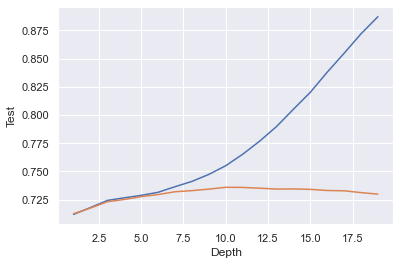

In [48]:
#Line graph of best train and test (cross validation) score and corrosonding depth for hyperparameter tuning
sb.lineplot(x="Depth",y="Train",data=depthcheck)
sb.lineplot(x="Depth",y="Test",data=depthcheck)
bestdepth = depthcheck.iloc[depthcheck['Test'].idxmax()]['Depth']
print('The best max_depth hyperparameter is', bestdepth)

In [55]:
#Using the tuned hyperparameter for best results
rfc = RandomForestClassifier(max_depth = bestdepth)

In [56]:
#Fiting train data to random forest classifer model
rfc.fit(xtrain,ytrain.values.ravel())

RandomForestClassifier(max_depth=10.0)

In [57]:
#Train Score
rfc.score(xtrain,ytrain)

0.7547268797347492

In [58]:
#Test Score
rfc.score(xtest,ytest)

0.7352134743439092

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7547268797347492

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7352134743439092



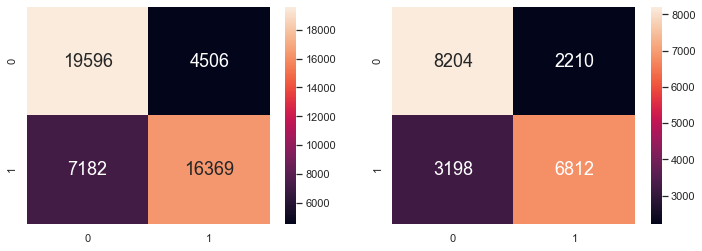

In [59]:
# Import essential models and functions from sklearn
from sklearn.metrics import confusion_matrix

# Checking for Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc.score(xtrain, ytrain))
print()

# Checking for Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc.score(xtest, ytest))
print()

# Plotting the Confusion Matrix for Train and Test Data
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ytrain, rfc.predict(xtrain)),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ytest, rfc.predict(xtest)), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [60]:
#Interactive element to find out the likelihood of cardiovascular disease
print('Please enter your weight(kg):')
weight = input()
while True:
    try:
        weight = float(weight)
        break
    except:
        print('Please enter the proper values.')
        weight = input()
print('Please enter your height(cm):')
height = input()
while True:
    try:
        height = float(height)
        break
    except:
        print('Please enter the proper values.')
        height = input()
print('Please enter your gender(M/F):')
while True:
    gender = input()
    if (gender == 'F' or gender == 'f'):
        gender = 1
        break
    if (gender == 'M' or gender == 'm'):
        gender = 2
        break
    print('Please enter the proper values.')
print('Please enter your age:')
age = input()
while True:
    try:
        age = float(age)
        break
    except:
        print('Please enter the proper values.')
        age = input()
print('Please enter your High(Systolic) blood pressure(mmHg):')
hbp = input()
while True:
    try:
        hbp = float(hbp)
        break
    except:
        print('Please enter the proper values.')
        hbp = input()
print('Please enter your Low(Diastolic) blood pressure(mmHg):')
lbp = input()
while True:
    try:
        lbp = float(lbp)
        break
    except:
        print('Please enter the proper values.')
        lbp = input()
print('Do you smoke regularly? (Y/N):')
while True:
    smoke = input()
    if (smoke == 'Y' or smoke == 'y'):
        smoke = 1
        break
    if (smoke == 'N' or smoke == 'n'):
        smoke = 0
        break
    print('Please enter the proper values.')
print('What is your glucose level? (1: normal, 2: above normal, 3: well above normal):')
while True:
    glu = input()
    if glu == '1' or glu == '2' or glu == '3':
        break
    print('Please enter the proper values.')
print('Do you consume alcohol regularly? (Y/N):')
while True:
    alc = input()
    if (alc == 'Y' or alc == 'y'):
        alc = 1
        break
    if (alc == 'N' or alc == 'n'):
        alc = 0
        break
    print('Please enter the proper values.')
print('Are you physically active? (Y/N):')
while True:
    act = input()
    if (act == 'Y' or act == 'y'):
        act = 1
        break
    if (act == 'N' or act == 'n'):
        act = 0
        break
    print('Please enter the proper values.')
print('What is your cholesterol level? (1: normal, 2: above normal, 3: well above normal):')
while True:
    cho = input()
    if cho == '1' or cho == '2' or cho == '3':
        break
    print('Please enter the proper values.')


cardio = rfc.predict([[age,gender,height,weight,hbp,lbp,cho,glu,smoke,alc,act]])
if cardio == 1:
    print("You have a high chance of having a cardiovascular disease. Find a doctor near you.")
if cardio == 0:
    print("Congratulations! You have a low chance of having a cardiovascular disease. Continue staying fit!")

Please enter your weight(kg):
65
Please enter your height(cm):
180
Please enter your gender(M/F):
m
Please enter your age:
23
Please enter your High(Systolic) blood pressure(mmHg):
99
Please enter your Low(Diastolic) blood pressure(mmHg):
60
Do you smoke regularly? (Y/N):
n
What is your glucose level? (1: normal, 2: above normal, 3: well above normal):
2
Do you consume alcohol regularly? (Y/N):
y
Are you physically active? (Y/N):
n
What is your cholesterol level? (1: normal, 2: above normal, 3: well above normal):
2
Congratulations! You have a low chance of having a cardiovascular disease. Continue staying fit!


In [61]:
# Logistic Regression 
from sklearn.model_selection import train_test_split

X = df.drop(['cardio'], axis=1)
y = df['cardio']

#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) 

In [62]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

85.00% in training set
15.00% in test set


In [63]:
#Checking for balance in data
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['cardio'] == 1]), (len(df.loc[df['cardio'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['cardio'] == 0]), (len(df.loc[df['cardio'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 33561 (49.30%)
Original False : 34516 (50.70%)

Training True  : 28572 (49.38%)
Training False : 29293 (50.62%)

Test True      : 4989 (48.85%)
Test False     : 5223 (51.15%)


1st max value of 0.657 occured at C=0.100


Text(0, 0.5, 'recall score')

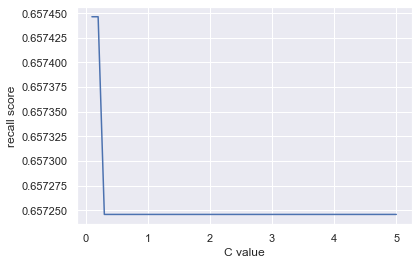

In [64]:
#Finding best hyperparameter (c_value) for Linear Regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5062300181456839

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5114571092831962



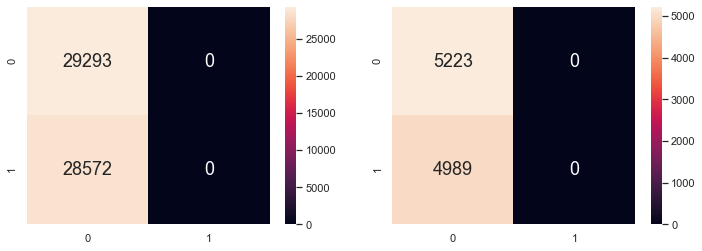

In [65]:
#Fitting model with best hyperparameter
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# Import essential models and functions from sklearn
from sklearn.metrics import confusion_matrix

# Checking for Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc.score(X_train, y_train))
print()

# Checking for Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc.score(X_test, y_test))
print()

# Plotting the Confusion Matrix for Train and Test Data
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rfc.predict(X_train)),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

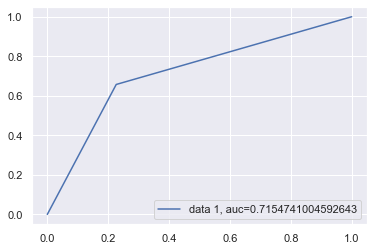

In [66]:
#Checking AUC of ROC to check if model is reliable
fpr, tpr, _ = metrics.roc_curve(y_test,  lr_predict_test)
auc = metrics.roc_auc_score(y_test, lr_predict_test)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [67]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 9)  # create the decision tree object
dectree.fit(xtrain, ytrain)                    # train the decision tree model

DecisionTreeClassifier(max_depth=9)

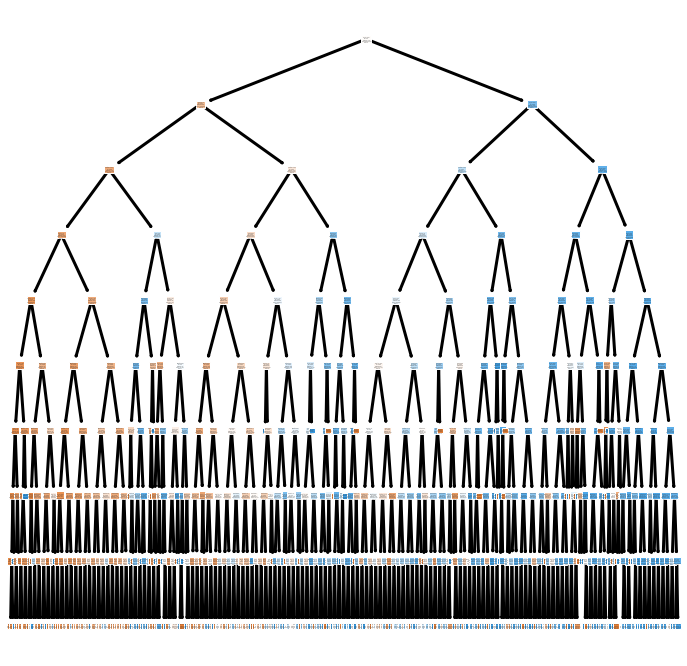

In [68]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = xtrain.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.747067340985877

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7312965139052096



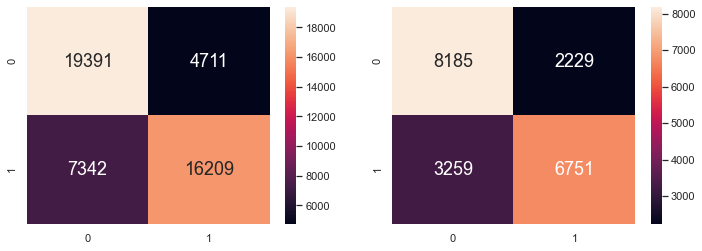

In [69]:
# Import essential models and functions from sklearn
from sklearn.metrics import confusion_matrix
y_train_pred = dectree.predict(xtrain)
y_test_pred = dectree.predict(xtest)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(xtrain, ytrain))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(xtest, ytest))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ytrain, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ytest, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])